# Approximation the Square Root of 2 Using the Bisection Method

## Bisection Method Algorithm

### Pseudocode

$$
\begin{array}{l}
\textbf{Algorithm: Bisection Method} \\ 
\textbf{Input:} \, f, a, b, \varepsilon, N \\ 
\textbf{Output:}\, \text{Approximate solution $r$ or error message} \\ 
\hline
1. \quad \text{Compute } f(a) \text{ and } f(b) \\
2. \quad \textbf{if } f(a) \cdot f(b) \geq 0 \textbf{ then} \\
3. \quad \quad \text{print "Bisection method fails"} \\
4. \quad \textbf{else} \\
5. \quad \quad a_k = a, \quad b_k = b \\
6. \quad \quad \textbf{for } k = 1,2,\dots,N \textbf{ do} \\
7. \quad \quad \quad r_k = \frac{a_k + b_k}{2} \\
8. \quad \quad \quad f_r = f(r_k) \\
9. \quad \quad \quad \textbf{if } f(a_k) \cdot f_r < 0 \textbf{ then} \\
10. \quad \quad \quad \quad b_k = r_k \\
11. \quad \quad \quad \textbf{else if } f(b_k) \cdot f_r < 0 \textbf{ then} \\
12. \quad \quad \quad \quad a_k = r_k \\
13. \quad \quad \quad \textbf{else if } f(a_k) \cdot f(b_k) = 0 \textbf{ or } \frac{b_k-a_k}{2} < \varepsilon \textbf{ then} \\
14. \quad \quad \quad \quad \text{print "Solution found successfully"} \\
15. \quad \quad \quad \quad \textbf{return } r_k \\
16. \quad \quad \quad \textbf{else} \\
17. \quad \quad \quad \quad \text{print "Bisection method fails"} \\
18. \quad \quad \quad \textbf{return } \frac{a_k + b_k}{2} \\
\hline
\end{array}
$$

### `python` implementation

#### Code without numerical libraries of `python`

```python
import numpy as np

def bisection_method(f, a, b, max_iter=100, tol=1e-9):
    """
    Implements the Bisection Method to find a root of f(x) within the interval [a, b].

    Parameters:
    -----------
    f : function
        The function for which the root is sought.
    a : float
        The lower bound of the interval.
    b : float
        The upper bound of the interval.
    max_iter : int, optional (default=100)
        The maximum number of iterations allowed.
    tol : float, optional (default=1e-9)
        The tolerance level for stopping the algorithm.

    Returns:
    --------
    float
        The estimated root of f(x).

    Raises:
    -------
    ValueError
        If f(a) and f(b) do not have opposite signs (root is not bracketed).
        If the method does not converge within max_iter iterations.
    """
    if f(a) * f(b) >= 0:
        raise ValueError("Bisection method fails: f(a) and f(b) must have opposite signs.")

    for _ in range(max_iter):
        midpoint = (a + b) / 2
        f_mid = f(midpoint)

        if abs(f_mid) < tol or (b - a) / 2 < tol:
            return midpoint  # Root found within tolerance

        if f(a) * f_mid < 0:
            b = midpoint
        else:
            a = midpoint

    raise ValueError(f"Bisection method did not converge after {max_iter} iterations.")

```

#### Code with numerical libraries of `python`

```python
import scipy.optimize as optimize

# Use scipy's bisect method to find the root
root = optimize.bisect(f, a, b, xtol=tol)

# Print the root
print(f"Approximate root: {root:.6f}")
```

## Problem

Using the bisection method, determine how many iterations are needed to approximate $\sqrt{2}$ with an accuracy of $10^{-4}$. Track the progress of the approximation at each step and compile the results in a table. 

The table should include the following columns:

- The iteration number $N$,
- The interval endpoints $a_N$ and $b_N$,
- The midpoint $p_N$,
- The corresponding approximation of the square root of $2$.

## Solution

Since $1 < 2 < 4$ and $f(x) = \sqrt{x}$ is monotonic, it follows that $1 < \sqrt{2} < 2$. To approximate $\sqrt{2}$ using the bisection method, we can select $a = 1$ and $b = 2$ as the endpoints of the interval. The error bound for the bisection method is given by:

$$
|p_N - p| \leq 2^{-N}(b - a).
$$

Substituting $b - a = 1$, we have:

$$
|p_N - p| \leq 2^{-N} < 10^{-4}.
$$

Taking the base-10 logarithm of both sides:

$$
-N \log_{10}(2) < -4.
$$

Rearranging gives:

$$
N > \frac{4}{\log_{10}(2)} \approx 13.28.
$$

Thus, at least 14 iterations are required to ensure the desired accuracy.

In [1]:
# Import library
import math

In [2]:
# Define the tolerance
tolerance = 1e-4

# Define the interval endpoints
a, b = 1, 2

# Calculate the minimum number of iterations N
N = math.ceil(math.log((b - a) / tolerance, 2))

# Print the result
print(f"The minimum number of iterations required is: {N}")

The minimum number of iterations required is: 14


In [3]:
import numpy as np

def bisection_method(f, a, b, max_iter=100, tol=1e-4, print_table=True):
    """
    Implements the Bisection Method to approximate a root of f(x) within [a, b].
    
    Parameters:
    -----------
    f : function
        The function whose root is being approximated.
    a : float
        The lower bound of the interval.
    b : float
        The upper bound of the interval.
    max_iter : int, optional (default=100)
        The maximum number of iterations.
    tol : float, optional (default=1e-4)
        The tolerance level for stopping.
    print_table : bool, optional (default=True)
        If True, prints the iteration table. Otherwise, only prints the final result.

    Returns:
    --------
    float
        The final approximation of the root.
    """

    if f(a) * f(b) >= 0:
        raise ValueError("Bisection method fails: f(a) and f(b) must have opposite signs.")

    # Define column widths
    col_widths = [5, 12, 12, 12, 12]
    header = (f"{'Iter':<{col_widths[0]}} {'a_N':<{col_widths[1]}} {'b_N':<{col_widths[2]}} " 
              f"{'p_N':<{col_widths[3]}} {'Approximation':<{col_widths[4]}}")
    separator = "-" * len(header)

    if print_table:
        print(header)
        print(separator)

    for n in range(1, max_iter + 1):
        midpoint = (a + b) / 2
        f_mid = f(midpoint)

        if print_table:
            print(f"{n:<{col_widths[0]}} {a:<{col_widths[1]}.6f} {b:<{col_widths[2]}.6f} "
                  f"{midpoint:<{col_widths[3]}.6f} {midpoint:<{col_widths[4]}.6f}")

        # Check stopping conditions
        if abs(f_mid) < tol or (b - a) / 2 < tol:
            if print_table:
                print(separator)
            print(f"Final approximation: {midpoint:.6f}")
            return midpoint

        # Update interval
        if f(a) * f_mid < 0:
            b = midpoint
        else:
            a = midpoint

    if print_table:
        print(separator)
    print("Maximum iterations reached.")
    return midpoint

In [4]:
# Define the function
def f(x):
    return x**2 - 2

# Run the bisection method with print_table=True to show the table, or False to hide it
bisection_method(f, a=1, b=2, tol=1e-4, print_table=True)

Iter  a_N          b_N          p_N          Approximation
----------------------------------------------------------
1     1.000000     2.000000     1.500000     1.500000    
2     1.000000     1.500000     1.250000     1.250000    
3     1.250000     1.500000     1.375000     1.375000    
4     1.375000     1.500000     1.437500     1.437500    
5     1.375000     1.437500     1.406250     1.406250    
6     1.406250     1.437500     1.421875     1.421875    
7     1.406250     1.421875     1.414062     1.414062    
8     1.414062     1.421875     1.417969     1.417969    
9     1.414062     1.417969     1.416016     1.416016    
10    1.414062     1.416016     1.415039     1.415039    
11    1.414062     1.415039     1.414551     1.414551    
12    1.414062     1.414551     1.414307     1.414307    
13    1.414062     1.414307     1.414185     1.414185    
----------------------------------------------------------
Final approximation: 1.414185


1.4141845703125

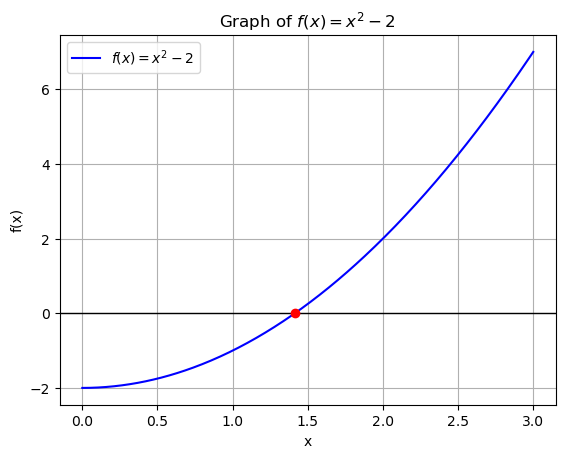

In [6]:
import matplotlib.pyplot as plt

# Define the interval for the plot
a, b = 1, 2  # Interval bounds
x = np.linspace(a - 1, b + 1, 400)  # X values for the plot
y = f(x)  # Y values for f(x)

# Plot the function
plt.plot(x, y, label="$f(x) = x^2 - 2$", color="blue")

# Mark the root (sqrt(2))
root = np.sqrt(2)
plt.axhline(0, color='black',linewidth=1)  # Horizontal line at y=0 (x-axis)
plt.plot(root, 0, 'ro')  # Red dot at the root (sqrt(2))

# Set the labels and title
plt.title("Graph of $f(x) = x^2 - 2$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)

# Show the plot
plt.show()